## 2a
the data is very strongly structured along a line (1 dimension), however, because there is slight variance in the dimensions orthogonal to that line it is neither a line or a plane. 

## 2b
In order to get the data cloud to lie in a lower dimension, a low rank approximation can be used to reduce the variance and converge the data into a lower dimension. In order to be considered a subspace it must also pass through the origin.

In [1]:
# Enable interactive rotation of graph
%matplotlib notebook

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
X = np.loadtxt('sdata.csv',delimiter=',')

<IPython.core.display.Javascript object>


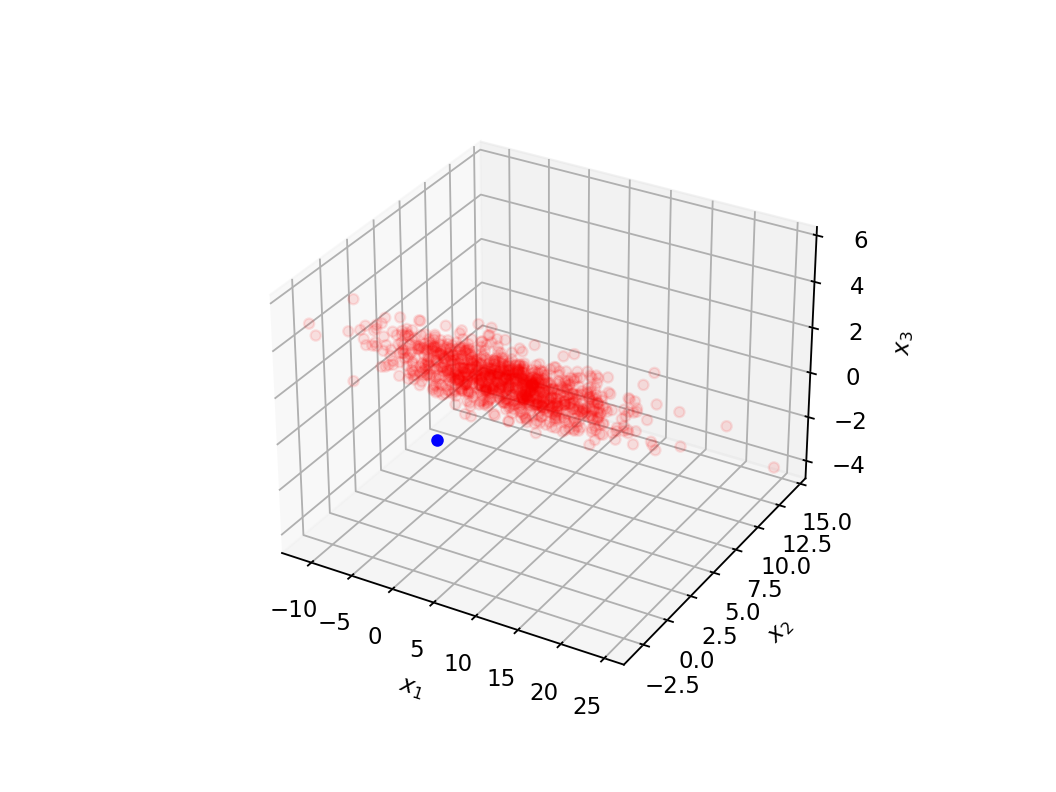

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [3]:
# Subtract mean
X_m = X - np.mean(X, 0)

# 2c
No subtracting the mean does not reduce the dimension that our data cloud lies in. But it does pass through the origin now so we are one step closer.  Subtracting the mean allows us to calculate the direction of the first principal component. Otherwise the direction would simply always point towards the mean. 

<IPython.core.display.Javascript object>


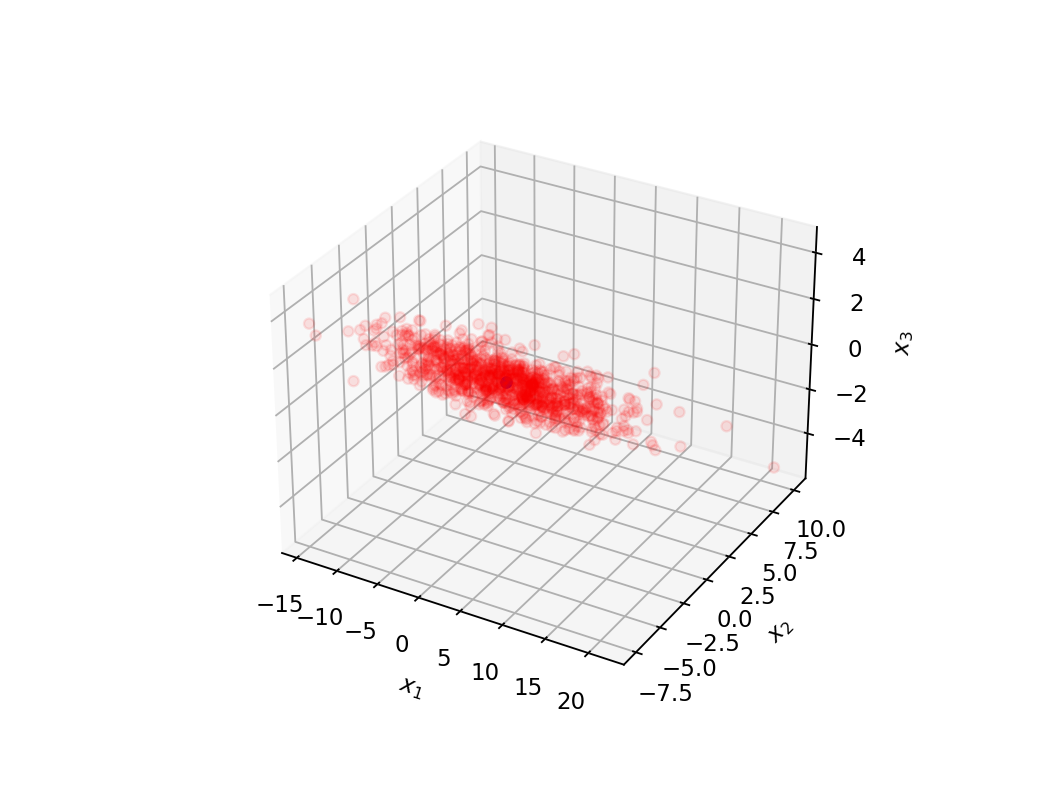

In [4]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

In [5]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=False)


# complete the next line of code to assign the first principal component to a

a = s[0] * VT[0]
a


array([-142.17075929,  -70.60988698,   36.15369819])

In [6]:
s.shape

(3,)

# 2d 
A one dimensional subspace using the 1st principal component does a good job capturing the data

<IPython.core.display.Javascript object>


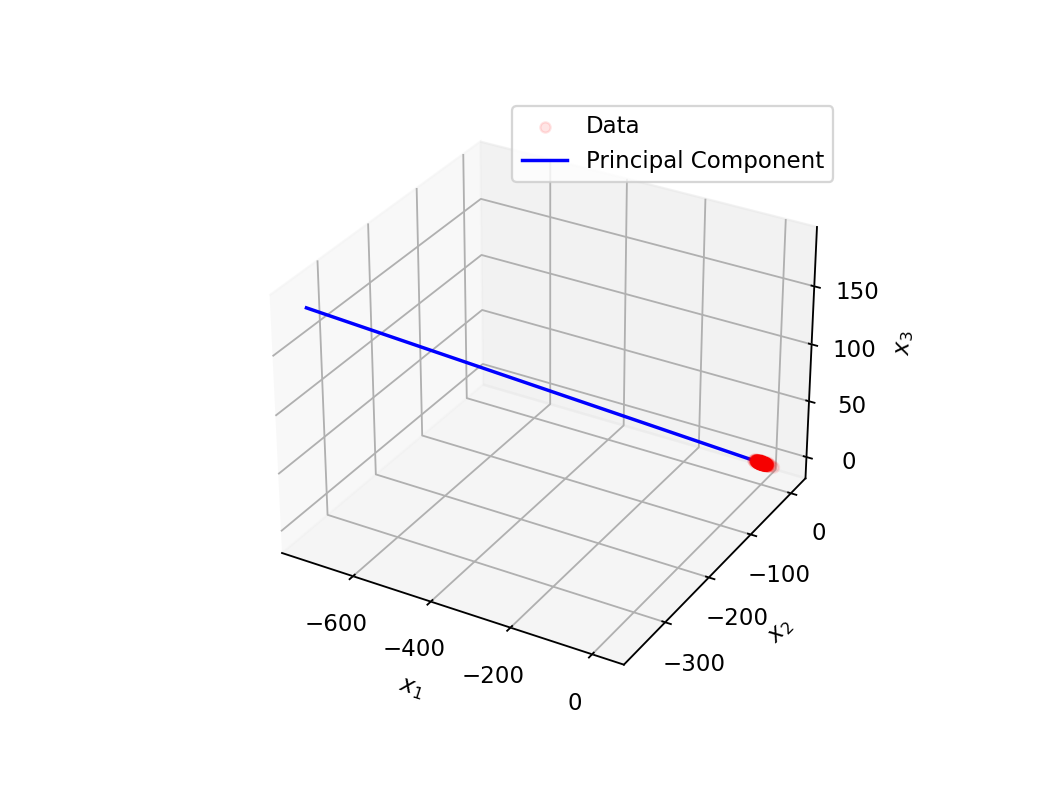

In [7]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#scale length of line by root mean square of data for display
ss = s[0]/np.sqrt(np.shape(X_m)[0])

ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

ax.plot([0,ss*a[0]],[0,ss*a[1]],[0,ss*a[2]], c='b',label='Principal Component')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')


ax.legend()
plt.show()

# 2e

In [8]:
# since a is unit norm then the least squares problem simplifies to w = a.T @ x
#in terms of U, S, V this would simplify to 

#(s[0] * VT[0]).T @ X_m

In [9]:
#X_m.T @ (s[0] * VT[0]) 

# 2f
Now write the original data xi, i = 1, 2, . . . , 1000 as xi ≈ awi + b. What is b?

b is the mean that was removed

# 2g
By subtracting the rank-one approximation from the original data, we obtain the residual matrix E, which contains the information that was not captured by the projection onto the subspace. The Frobenius norm of E can be calculated by the sum of the squared remaining singular values which in this case is σ2 and σ3


# 2H
We can use the first two colums of VT as our basis since the singular vectors are orthonormal. Also this would give us a rank 2 approximation of the 2 most prominant directions of the data. 

In [10]:

VT[0:1, :] 


array([[-0.87325954, -0.43370914,  0.2220679 ]])

In [11]:
VT[1:2, :] 

array([[0.24467994, 0.00379784, 0.96959646]])

<IPython.core.display.Javascript object>


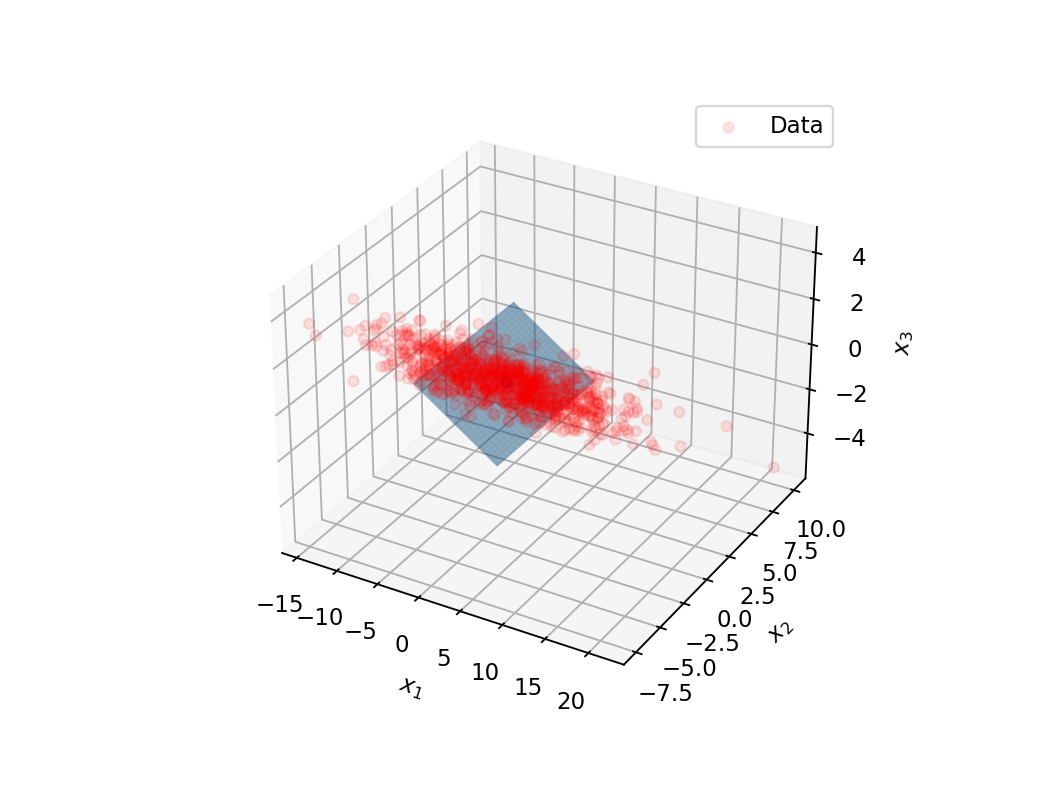

In [12]:
# display zero mean scatter plot and plane defined by orthonormal basis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot original data
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', label='Data', alpha=0.1)

# define the orthonormal basis
u = np.array([-0.87325954, -0.43370914, 0.2220679])
v = np.array([-0.42136623,  0.90104493,  0.10280342])

# compute normal vector to plane
n = np.cross(u, v)

# generate grid of points on plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 25), np.linspace(-5, 5, 25))
zz = (-n[0]*xx - n[1]*yy)/n[2]

# plot the plane
ax.plot_surface(xx, yy, zz, alpha=0.5)

# plot the origin
ax.scatter(0, 0, 0, c='b', marker='o')

# set labels and legend
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.legend()

plt.show()

## 2i


In [13]:
S = np.diag(s)

In [14]:
S[0:2,0:2] @  U.T[:2, :]

array([[-12.27642044,  -3.80427377,  -2.42719504, ...,  -0.50763642,
         -1.50494447,   5.32550802],
       [  1.89556542,   0.37776358,  -0.10249701, ...,   0.3756265 ,
          1.13778456,  -0.63069539]])

In [ ]:
VT.T[: , :2] @

In [31]:
w2 = U[:, :2] @ np.diag(s[:2]) @ VT[:2]

In [32]:
w2 

array([[11.18430814,  5.3315948 , -0.88826538],
       [ 3.41454955,  1.65138299, -0.47852885],
       [ 2.09449227,  1.0523074 , -0.63838285],
       ...,
       [ 0.53520662,  0.22159313,  0.25147638],
       [ 1.59260018,  0.6570293 ,  0.76899203],
       [-4.80486921, -2.31211678,  0.57110436]])

In [33]:
w2.shape

(1000, 3)

In [18]:
X_m.shape

(1000, 3)

<IPython.core.display.Javascript object>


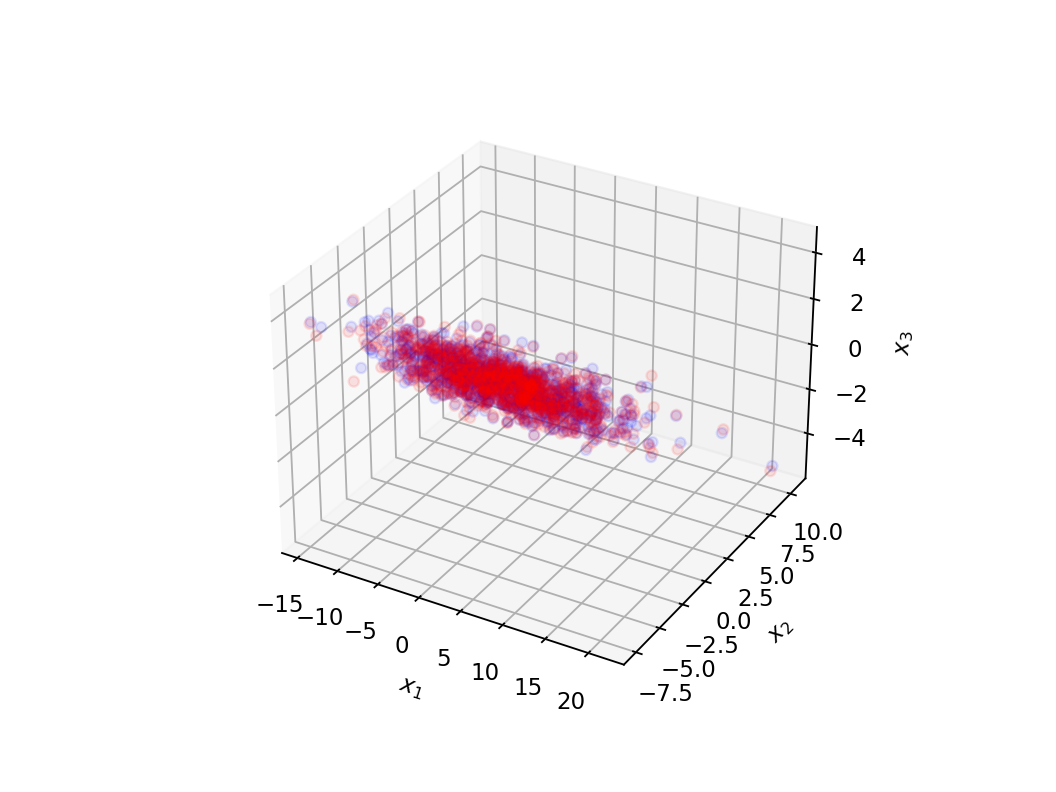

In [37]:
# display zero mean scatter plot
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_m[:,0], X_m[:,1], X_m[:,2], c='r', marker='o', alpha=0.1)
ax.scatter(w2[:,0], w2[:,1], w2[:,2], c='b', marker='o', label='Rank-2', alpha=0.1)

ax.scatter(0,0,0,c='b', marker='o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')

plt.show()

# 2j
The F - norm of the E from our rank - 2 approximation will be the square of the 3rd singular value

# 2k


In [ ]:
(s[2])

In [ ]:
##Rank 1 Approximation 
#E
print((21.765)**2 + (12.367)**2)

In [ ]:
#rank 2 approximation 
#E
(12.367)**2